In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from config import AlphaVan_key

base_url = f'https://www.alphavantage.co/query?interval=monthly&apikey={AlphaVan_key}&function='

In [3]:
# Define function for searching AlphaAPI
def search_AlphaAPI(search_term):
    url = base_url + search_term
    response = requests.get(url).json()
    return response

In [4]:
# Import Coffee / Natural Gas / Oil WTI price data from Api and turn it into Json format and
# store them each as their own variable
Coffee_data = search_AlphaAPI("COFFEE")
NG_data = search_AlphaAPI("NATURAL_GAS")
WTI_data = search_AlphaAPI("WTI")

In [5]:
# Convert Coffee price data into a dataframe and remove useless information, clean up data by rounding
df = pd.DataFrame(Coffee_data["data"])
Coffee_df = df[df["value"] != "."]
Coffee_df["value"] = Coffee_df["value"].astype(float).round(2)

C:\Users\marti\AppData\Local\Temp\ipykernel_15220\2260998949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coffee_df["value"] = Coffee_df["value"].astype(float).round(2)


In [6]:
# Convert Natural Gas and WTI price data into Dataframes, no clean up needed
NG_df = pd.DataFrame(NG_data["data"])
WTI_df = pd.DataFrame(WTI_data["data"])

In [7]:
# Filter Coffee dataframe to include 10 years of data for later merging to compare 10 years of data
Filtered_Coffee_df = Coffee_df[Coffee_df.date.between("2013-08-01", "2023-08-01")]

In [8]:
# Merge Coffee, Natural Gas, and WTI data into on dataframe of 10 years of data
Merged_df = pd.merge(Filtered_Coffee_df,NG_df,on="date")
Merged_df = Merged_df.rename(columns={"value_x":"Coffee Price", "value_y": "Natural Gas Price"})
New_Merged_df = pd.merge(Merged_df,WTI_df,on="date")
New_Merged_df = New_Merged_df.rename(columns={"value":"WTI Price"})
New_Merged_df = New_Merged_df.set_index("date")
New_Merged_df

,Coffee Price,Natural Gas Price,WTI Price
date,,,
2023-08-01,186.35,2.58,81.39
2023-07-01,193.49,2.55,76.07
2023-06-01,207.38,2.18,70.25
2023-05-01,220.12,2.15,71.58
2023-04-01,229.96,2.16,79.45
...,...,...,...
2013-12-01,125.74,4.24,97.63
2013-11-01,122.02,3.64,93.86
2013-10-01,128.70,3.68,100.54


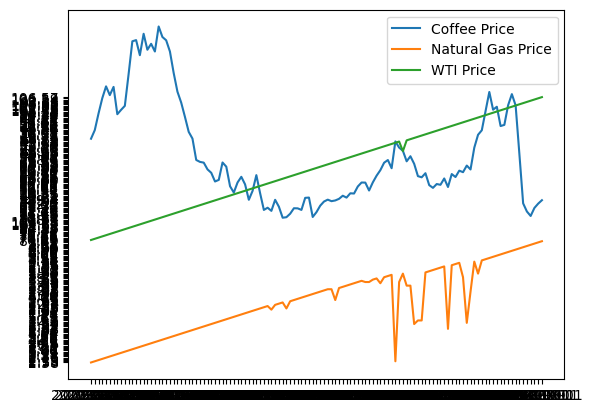

In [13]:
plt.plot(New_Merged_df["Coffee Price"], label = "Coffee Price")
plt.plot(New_Merged_df["Natural Gas Price"], label = "Natural Gas Price")
plt.plot(New_Merged_df["WTI Price"], label = "WTI Price")

plt.legend()
plt.show()

